#Biomedical abstracts | Text analysis

After extracting article abstracts of interest, we can use them for further analysis.

The goal is to **automate literature analysis** when doing research work. My topic of choice for this analysis is "neuroplasticity". It's quite a broad topic, so i'm interested what other topics might be related to neuroplasticity research.

This analysis may be useful if i'm interested in most common topics. It could give a more definitive answer to questions about what type of research is currently in vogue in my area of interest.

In [1]:
!pip install texthero -q
!pip install textfeatures -q
!pip install kneed -q
!pip install -U scikit-learn -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import texthero as hero
from texthero import preprocessing
import textfeatures as tf

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from kneed import KneeLocator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import sklearn
sklearn.show_versions()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



System:
    python: 3.7.13 (default, Mar 16 2022, 17:37:17)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 21.1.3
   setuptools: 57.4.0
      sklearn: 1.0.2
        numpy: 1.21.6
        scipy: 1.4.1
       Cython: 0.29.28
       pandas: 1.3.5
   matplotlib: 3.2.2
       joblib: 1.1.0
threadpoolctl: 3.1.0

Built with OpenMP: True


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna,
                    preprocessing.lowercase,
                    preprocessing.remove_digits,
                    preprocessing.remove_punctuation,
                    preprocessing.remove_diacritics,
                    preprocessing.remove_stopwords,
                    preprocessing.remove_whitespace]

In [4]:
df = pd.read_csv('abstracts.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3000 non-null   int64 
 1   Title       3000 non-null   object
 2   Abstract    3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [6]:
df = df.rename(columns={'Unnamed: 0': 'Id'})
df.set_index('Id')

,Title,Abstract
Id,,
0,Interrogating the function of GABA<sub>A</sub>...,To better understand neural circuits and behav...
1,Floralozone improves cognitive impairment in v...,Vascular dementia (VD) is the second largest t...
2,"The effects of Vilazodone, YL-0919 and Vortiox...",Parkinson's disease is a neurodegenerative dis...
3,Deciphering therapeutic options for neurodegen...,Silent information regulator 1 (SIRT1) is a ni...
4,Therapeutic effect of extracellular vesicles f...,Extracellular vesicles (EVs) are biologically ...
...,...,...
2995,Challenges and opportunities in translational ...,"For decades, basic research on the underlying ..."
2996,Growth and Differentiation of Circulating Stem...,Stem cell therapy is gaining momentum as an ef...
2997,Remote Ischemic Postconditioning vs. Physical ...,There remain debates on neuroprotection and re...


# Cleaning abstracts

In [7]:
df['clean_abstracts'] = hero.clean(df['Abstract'], pipeline = custom_pipeline)
df

,Id,Title,Abstract,clean_abstracts
0,0,Interrogating the function of GABA<sub>A</sub>...,To better understand neural circuits and behav...,better understand neural circuits behavior mic...
1,1,Floralozone improves cognitive impairment in v...,Vascular dementia (VD) is the second largest t...,vascular dementia vd second largest type demen...
2,2,"The effects of Vilazodone, YL-0919 and Vortiox...",Parkinson's disease is a neurodegenerative dis...,parkinson disease neurodegenerative disease of...
3,3,Deciphering therapeutic options for neurodegen...,Silent information regulator 1 (SIRT1) is a ni...,silent information regulator sirt1 nicotinamid...
4,4,Therapeutic effect of extracellular vesicles f...,Extracellular vesicles (EVs) are biologically ...,extracellular vesicles evs biologically active...
...,...,...,...,...
2995,2995,Challenges and opportunities in translational ...,"For decades, basic research on the underlying ...",decades basic research underlying mechanisms n...
2996,2996,Growth and Differentiation of Circulating Stem...,Stem cell therapy is gaining momentum as an ef...,stem cell therapy gaining momentum effective t...
2997,2997,Remote Ischemic Postconditioning vs. Physical ...,There remain debates on neuroprotection and re...,remain debates neuroprotection rehabilitation ...
2998,2998,Working Memory for Signs with Poor Visual Reso...,Stimulus degradation adds to working memory lo...,stimulus degradation adds working memory load ...


In [8]:
# Getting word count using text features
tf.word_count(df,"clean_abstracts","word_cnt")
df[["clean_abstracts","word_cnt"]].head(10)

,clean_abstracts,word_cnt
0,better understand neural circuits behavior mic...,133
1,vascular dementia vd second largest type demen...,190
2,parkinson disease neurodegenerative disease of...,215
3,silent information regulator sirt1 nicotinamid...,102
4,extracellular vesicles evs biologically active...,79
5,tauopathies group neurodegenerative diseases a...,91
6,management chronic neuropathic pain remains ch...,97
7,neuromuscular training nmt facilitates acquisi...,18
8,post traumatic stress disorder ptsd emerged se...,23
9,substantial evidence indicates bisphenol bpa u...,141


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=1000)

In [10]:
# Data preprocessing
documents = df['clean_abstracts'].values.astype("U")

#vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
features = vectorizer.fit_transform(documents)

In [11]:
features

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 153327 stored elements in Compressed Sparse Row format>

In [12]:
feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# K-Means

1) Deciding the number of clusters

In [13]:
kmeans_kwargs = {  
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []  # sum of squared error (distances in our case)
for k in range(1, 21):  # we will try clustering data into range(1, 11) clusters
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)  # initiates the k-means algorithm
  kmeans.fit(features)  # fits k-means on our data
  sse.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center.kl.plot_knee()

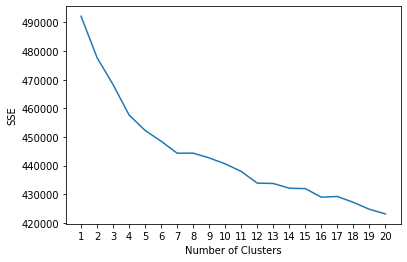

In [14]:
fig, axs = plt.subplots()
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

fig.set(facecolor='white')
plt.show()

In [15]:

kl = KneeLocator(
    range(1, 21), sse, curve="convex", direction="decreasing"
    )

print(f'We should use {kl.elbow} clusters.')

We should use 7 clusters.


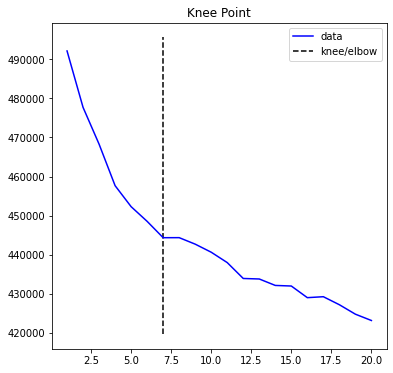

In [16]:
kl.plot_knee()

In [17]:
k = 10
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [18]:
df['cluster'] = model.labels_

df.head()

,Id,Title,Abstract,clean_abstracts,word_cnt,cluster
0,0,Interrogating the function of GABA<sub>A</sub>...,To better understand neural circuits and behav...,better understand neural circuits behavior mic...,133,6
1,1,Floralozone improves cognitive impairment in v...,Vascular dementia (VD) is the second largest t...,vascular dementia vd second largest type demen...,190,2
2,2,"The effects of Vilazodone, YL-0919 and Vortiox...",Parkinson's disease is a neurodegenerative dis...,parkinson disease neurodegenerative disease of...,215,6
3,3,Deciphering therapeutic options for neurodegen...,Silent information regulator 1 (SIRT1) is a ni...,silent information regulator sirt1 nicotinamid...,102,5
4,4,Therapeutic effect of extracellular vesicles f...,Extracellular vesicles (EVs) are biologically ...,extracellular vesicles evs biologically active...,79,5


In [19]:
# output the result to a text file.

clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['Id','Abstract']] # get title and overview columns
    f.write(data.to_csv(index_label='Id')) # set index to id
    f.close()

In [20]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 motor
 stimulation
 brain
 stroke
 plasticity
 functional
 effects
 patients
 training
 changes
------------
Cluster 1:
 synaptic
 plasticity
 memory
 activity
 synapses
 neuronal
 term
 long
 learning
 ltp
------------
Cluster 2:
 mice
 memory
 hippocampal
 expression
 hippocampus
 cognitive
 rats
 plasticity
 brain
 synaptic
------------
Cluster 3:
 neurons
 neuronal
 plasticity
 brain
 activity
 synaptic
 cells
 cell
 function
 expression
------------
Cluster 4:
 sup
 ca
 mice
 sub
 neurons
 synaptic
 spike
 neuronal
 signaling
 plasticity
------------
Cluster 5:
 brain
 plasticity
 neuronal
 effects
 pain
 mechanisms
 changes
 role
 synaptic
 disease
------------
Cluster 6:
 sub
 gaba
 receptor
 sup
 synaptic
 receptors
 plasticity
 brain
 neuronal
 inhibition
------------
Cluster 7:
 arc
 ltp
 memory
 mice
 ko
 hippocampal
 mechanisms
 plasticity
 maintenance
 long
------------
Cluster 8:
 sup
 ca
 synaptic
 mice
 plasticity
 neuronal
 neurons
 bra

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Wordcloud

In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stop_words = set(stopwords.words('english'))

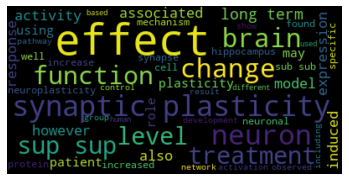

In [23]:
abs = " ".join(abstract for abstract in df.clean_abstracts)
wordcloud2 = WordCloud(stopwords=stop_words, max_words=50).generate(abs)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()